# Task 1. Better Correlation Coefficient-Finding Program

In [1]:
sample_list_1 = [1, 2, 3]
sample_list_2 = [4, 5, 6]

In [2]:
def corr_xy(x, y):
    if len(x) != len(y): # lists' length doesn't match
        print('Oops!')
    else:
        mean_x = sum(x) / len(x)
        mean_y = sum(y) / len(y)
        numerator = sum([(xi - mean_x) * (yi - mean_y) for xi, yi in zip(x,y)])
        den_one = sum([(xi - mean_x) ** 2 for xi in x])
        den_two = sum([(yi - mean_y) ** 2 for yi in y]) 
        return numerator / (den_one * den_two) ** 0.5


In [3]:
corr_xy(sample_list_1, sample_list_2)

1.0

# Task 2. Statistic Calculator

In [4]:
def list_median(some_list):
    """returns median of the list"""
    my_list = sorted(some_list) # не используйте .sort() или не включайте функцию в другие функции, работающие с этой же переменной
    if len(my_list) % 2 == 0: # для случая с четным числом элементов
        return (my_list[int(len(my_list) / 2 - 1)] + my_list[int(len(my_list) / 2)]) / 2
    else:
        return my_list[int(len(my_list) / 2)] # нечетный случай

In [5]:
def list_mult_mode(my_list):
    """Returns all the modes (single if it's only one in a list)"""
    from collections import Counter
    com = Counter(my_list)
    com_list = com.most_common()
    return [x[0] for x in com_list if x[1] == com_list[0][1]]    

In [6]:
a = list_mult_mode([1, 1, 2, 2, 3])
print(* a)

1 2


In [7]:
def var_list(my_list):
    """Calculates variance"""
    list_mean = sum(my_list) / len(my_list)
    var_list = [(x - list_mean) ** 2 for x in my_list]
    return sum(var_list) / len(var_list)  

In [8]:
def open_file(file_name, mode):
    """Opens a file or closes the program"""
    import sys
    try:
        the_file = open(file_name, mode, encoding='utf-8')
    except IOError as e:
        print('Can\'t open the file', file_name, 'the program is closing now. \n', e)
        input('Print Enter to cancel')
        sys.exit()
    else:
         return the_file 

In [9]:
def statistic_calc(my_list):
    import math
    mean  = sum(my_list) / len(my_list) #don't need a separate function
    print('Mean: {0:.3f}'.format(mean))
    median = list_median(my_list)
    print('Median: {0:.3f}'.format(median))
    modes = list_mult_mode(my_list) 
    print('Modes:', end=' ')
    print(* modes) # if there more than one
    variance = var_list(my_list)
    print('Variance: {0:.3f}'.format(variance))
    std_dev = math.sqrt(variance)
    print('Standart deviation: {0:.3f}'.format(std_dev)) # that is sqrt of dispersion (=sqrt of Var(x, y))

In [10]:
def main_stat_calc():
    my_file_path = '/home/bakunobu/Desktop/num_list.txt'
    my_file = open_file(my_file_path, 'r')
    numbers = my_file.read().split(' ')
    my_nums = [int(x) for x in numbers]
    print('List:', end=' ')
    print(* my_nums)
    statistic_calc(my_nums)

In [11]:
if __name__ == '__main__':
    main_stat_calc()

List: 1 2 3 4 5 4 3 7 3 22 2 2 8 14 9 9 9 9 2 2 2 2 5 6 6
Mean: 5.640
Median: 4.000
Modes: 2
Variance: 21.270
Standart deviation: 4.612


# Task 3. Data CSV Analysis (The US Population Data)

In [12]:
def open_file_csv(file_name):
    """Opens a file or closes the program"""
    import sys, csv
    try:
        the_file = open(file_name)
        csv_data = csv.reader(the_file)
        next(csv_data)
        year = []
        popul = []
        for row in csv_data:
            year.append(row[0])
            popul.append(row[1])
    except IOError as e:
        print('Can\'t open the file', file_name, 'the program is closing now. \n', e)
        input('Print Enter to cancel')
        sys.exit()
    else:
        return year, popul
    

In [13]:
def data_prep(date, humans):
    year = [int(x[-4:]) for x in date] # don't need day and month
    year = year[1:] # shape length - we'll have -2 comparisons
    year = year[:-1]
    year = year[::-1] # first years first
    population = []
    for x in humans:
        a = x.split(' ') # original format is *x.xx millions
        population.append(float(a[0]) * 10 ** 6) # convert it into numbers
    pop_dif = []
    for i in range(1, len(population) - 1):
        p = population[i - 1] - population[i]
        pop_dif.append(p) # a list of year-to-year-comparisons
    return year, pop_dif[::-1]#need a reversed list that matches with years
    

In [14]:
def show_plot(x, y, name_x, name_y, name_t):
    """creates a plot"""
    import matplotlib.pyplot as plt
    plt.plot(x, y)
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.title(name_t)
    plt.show()

In [15]:
def main_pop_stat():
    """The main function that accepts a CSV file and do some conversions"""
    my_file = '/home/bakunobu/Documents/us_census_1900_2018.csv'
    date, humans = open_file_csv(my_file)
    name_x = 'Years'
    name_y = 'Population changes'
    name_t = 'Dynamics of changes in the US Population \n(1900-2018)'
    year, pop_difs = data_prep(date, humans)
    statistic_calc(pop_difs)
    show_plot(year, pop_difs, name_x, name_y, name_t)
    

Mean: 2131525.424
Median: 2195000.000
Modes: 1470000.0 2160000.0 2850000.0
Variance: 498692588336.685
Standart deviation: 706181.696


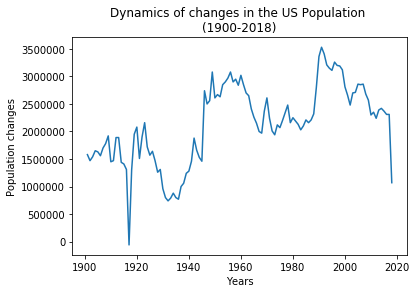

In [16]:
%matplotlib inline
if __name__ == '__main__':
    main_pop_stat()

# Task 4. Finding a Percentile

\begin{align}
i = \frac{np}{100}+0.5
\end{align}

In [17]:
def find_percentile(my_list, p):
    my_list.sort()
    i = (len(my_list) * p) / 100 + 0.5
    if i.is_integer():
        return my_list[int(i-1)] # we need that -1 shift because the lists's items numeration starts with 0
    else:
        import math
        k, f = math.floor(i), i - math.floor(i) #use build in function to get an integral part, int() seems to work the same way
        return (1 - f) * my_list[k-1] + f * my_list[k] # same adjustment

In [18]:
digits = [5, 1, 9, 3, 14, 9, 7]
find_percentile(digits, 25)

3.5

# Task 5. Creating a Grouped Frequaency Table

In [19]:
def create_classes(num_list, n):
    from collections import Counter
    import math
    if n == 1:
        print('Single group with {} elements'.format(len(num_list)))
    width = (max(num_list) - min(num_list)) / n # idk why, it's from the task
    com = Counter(num_list)
    com_list = com.most_common()
    com_list.sort()
    groups = [[min(num_list) + i * width, 0] if i == 0 else [i * width, 0] for i in range(0, n)]
    for item in com_list:
        if item[0] < groups[0][0]:
            groups[0][1] += item[1]
        elif item[0] >= groups[-1][0]:
            groups[-1][1] += item[1]
        else:
            i = math.floor(item[0] / width) #simple index finder
            groups[i][1] += item[1]
    if n > 1:        
        print('Grade\\Frequency')
    for i in range(len(groups)):
        if n == 1:
            pass
        elif i == (len(groups) - 1):
            print('{0}+\t :\t {1}'.format(groups[i][0], groups[i][1]))
        else:
            print('{0} - {1}:\t {2}'.format(groups[i][0], groups[i + 1][0], groups[i][1]))
    

In [20]:
nums = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
create_classes(nums, 3)

Grade\Frequency
1.0 - 3.0:	 3
3.0 - 6.0:	 3
6.0+	 :	 14
